In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold, cross_val_score, train_test_split # Model evaluation
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler # Preprocessing
from sklearn.linear_model import Lasso, Ridge, ElasticNet, RANSACRegressor # Linear models
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, ExtraTreesRegressor, GradientBoostingRegressor # Ensemble methods
from xgboost import XGBRegressor, plot_importance # XGBoost
from sklearn.svm import SVR  # Support Vector Regression
from sklearn.tree import DecisionTreeRegressor # Decision Tree Regression
from sklearn.pipeline import Pipeline # Streaming pipelines
from sklearn.decomposition import KernelPCA, PCA # Dimensionality reduction
from sklearn.feature_selection import SelectFromModel # Dimensionality reduction
from sklearn.model_selection import learning_curve, validation_curve, GridSearchCV # Model evaluation
from sklearn.metrics import mean_squared_error as MSE
sns.set_style("whitegrid")
%matplotlib inline

In [2]:
# File Import
Train_data_v1= pd.read_csv('C:/Users/rahul.bhasin/Desktop/Hackathon/Original/train.csv')
Test_data_v1= pd.read_csv('C:/Users/rahul.bhasin/Desktop/Hackathon/Original/test.csv')
Train_data_v1.head(4)

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942.0,2.0,155623,7855.0,42.0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0
2,468453,c,1358.0,4.0,56177,8067.0,60.0
3,96996,a,264.0,3.0,168793,27064.0,9.0


In [3]:
# EDA
Train_data_v1.describe().round()

,ID,Reputation,Answers,Username,Views,Upvotes
count,330045.0,330045.0,330045.0,330045.0,330045.0,330045.0
mean,235749.0,7773.0,4.0,81443.0,29645.0,338.0
std,136039.0,27061.0,4.0,49215.0,80956.0,3592.0
min,1.0,0.0,0.0,0.0,9.0,0.0
25%,117909.0,282.0,2.0,39808.0,2594.0,8.0
50%,235699.0,1236.0,3.0,79010.0,8954.0,28.0
75%,353620.0,5118.0,5.0,122559.0,26870.0,107.0
max,471493.0,1042428.0,76.0,175738.0,5231058.0,615278.0


In [4]:
#Outlier Treatment

#Train_data_v1.describe(percentiles=(0.01,0.03,0.05,0.10,0.25,0.50,0.75,0.90,0.95,0.96,0.97,0.98,0.99)).round()
#Train_data_v2 = Train_data_v1.copy()
#Train_data_v2['Reputation']=np.clip(Train_data_v2['Reputation'],None,113925)
#Train_data_v2['Answers']=np.clip(Train_data_v2['Answers'],None,18)
#Train_data_v2['Views']=np.clip(Train_data_v2['Views'],None,316887)
#Train_data_v2['Upvotes']=np.clip(Train_data_v2['Upvotes'],None,5030)
#Train_data_v2.describe(percentiles=(0.01,0.03,0.05,0.10,0.25,0.50,0.75,0.90,0.95,0.96,0.97,0.98,0.99)).round()

In [5]:
Train_data_v1.columns
Train_data_v1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330045 entries, 0 to 330044
Data columns (total 7 columns):
ID            330045 non-null int64
Tag           330045 non-null object
Reputation    330045 non-null float64
Answers       330045 non-null float64
Username      330045 non-null int64
Views         330045 non-null float64
Upvotes       330045 non-null float64
dtypes: float64(4), int64(2), object(1)
memory usage: 17.6+ MB


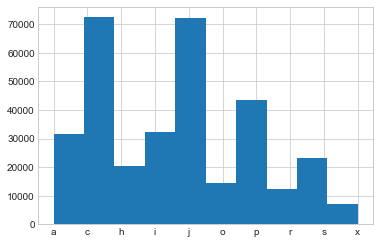

In [6]:
Train_data_v1['Tag'].unique()
Train_data_v1.groupby("Tag").count()
Train_data_v1['Tag'].hist()

In [7]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
number=LabelEncoder()
Train_data_v1['Tag']=number.fit_transform(Train_data_v1['Tag'].astype('str'))
Test_data_v1['Tag']=number.fit_transform(Test_data_v1['Tag'].astype('str'))
Train_data_v1.head(4)

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,0,3942.0,2.0,155623,7855.0,42.0
1,327662,0,26046.0,12.0,21781,55801.0,1175.0
2,468453,1,1358.0,4.0,56177,8067.0,60.0
3,96996,0,264.0,3.0,168793,27064.0,9.0


In [8]:
#Train_data_v1.groupby("Username").count()
#Train_data_v1.Username.value_counts().head()

In [9]:
# Converting Float to int64 and Objects to category

#for col in train.select_dtypes(include=['object']).columns:
#    train[col] = train[col].astype('category')
#    test[col] = test[col].astype('category')

cols =  ['Tag','Username']
cols2 = ['Reputation','Answers','Views']

for col in cols:
    Train_data_v1[col] = Train_data_v1[col].astype('category')
    Test_data_v1[col]  = Test_data_v1[col].astype('category')
    
for col in cols2:
    Train_data_v1[col] = Train_data_v1[col].astype('int64')
    Test_data_v1[col]  = Test_data_v1[col].astype('int64')  
    
Train_data_v1['Upvotes']  = Train_data_v1['Upvotes'].astype('int64')     

print (Train_data_v1.dtypes)

ID               int64
Tag           category
Reputation       int64
Answers          int64
Username      category
Views            int64
Upvotes          int64
dtype: object


In [10]:
#Train_data_v1.head(4)

In [11]:
Train_data_v1.isnull().sum(axis = 0)

ID            0
Tag           0
Reputation    0
Answers       0
Username      0
Views         0
Upvotes       0
dtype: int64

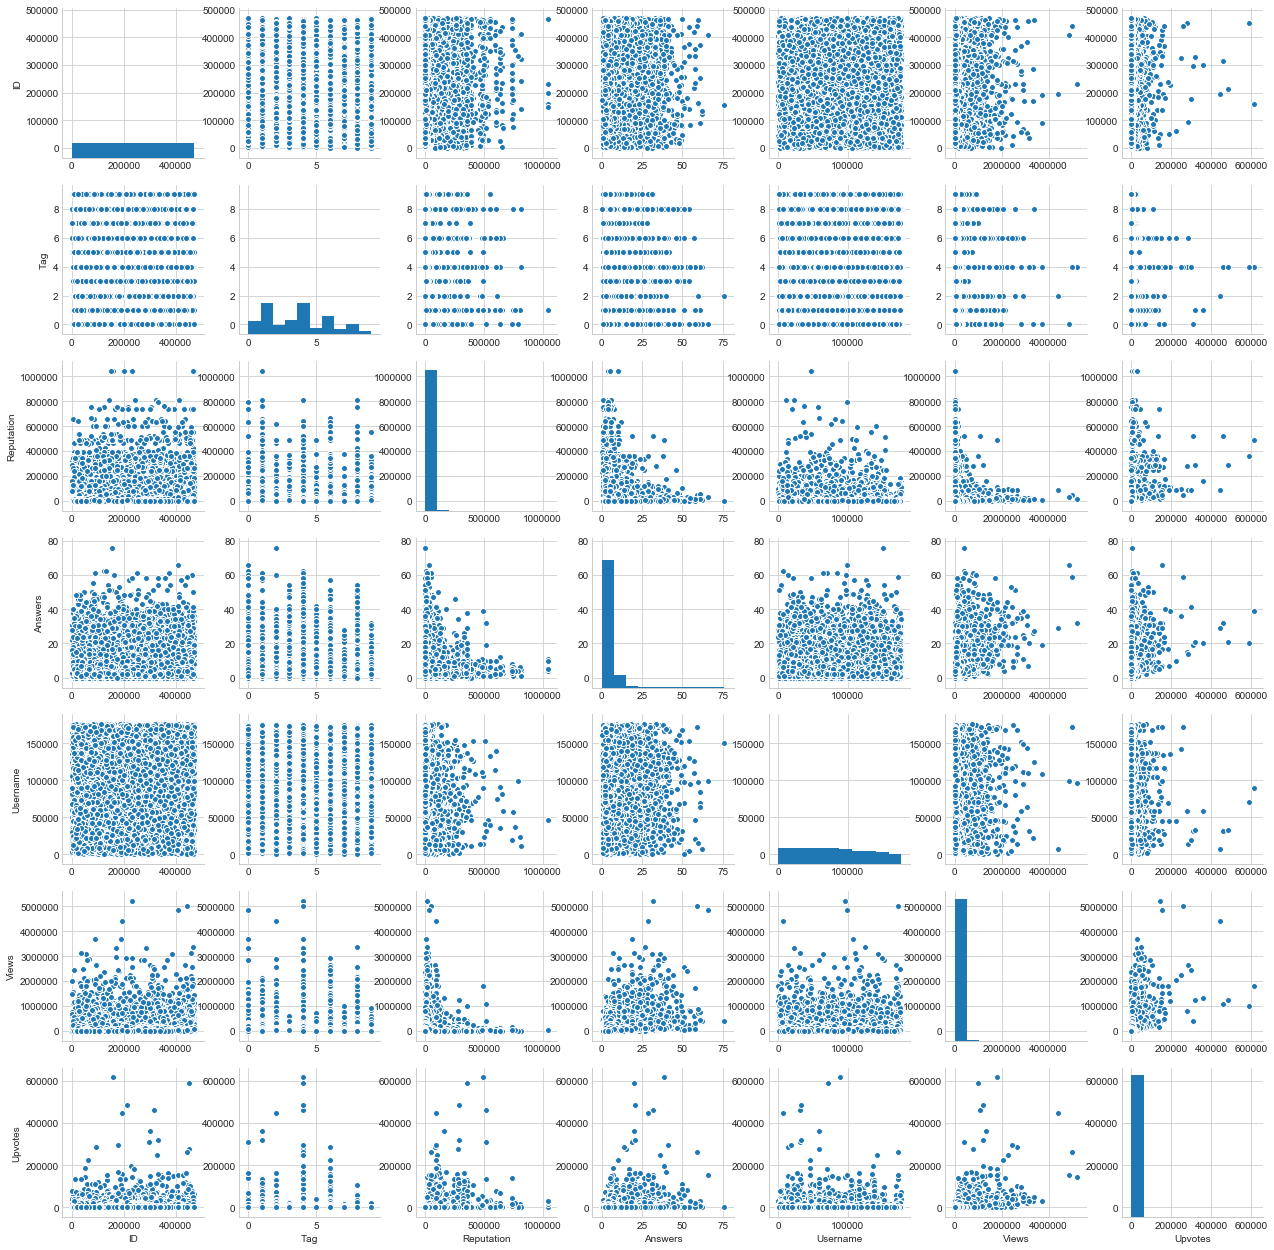

In [12]:
# Pairplot
sns.pairplot(Train_data_v1)

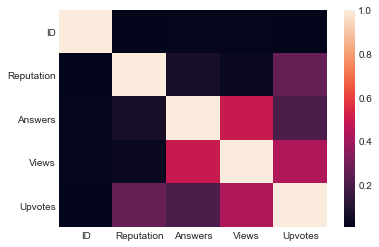

In [13]:
#Correlation
sns.heatmap(Train_data_v1.corr())

In [15]:
X=Train_data_v1[['Tag','Username','Reputation','Answers','Views']]  # Features
Y=Train_data_v1['Upvotes']  # Labels

In [17]:
#########################
###  Without Scaling  ###

from sklearn.ensemble import RandomForestRegressor
#clf=RandomForestRegressor(n_estimators=50,random_state=100,n_jobs=-1,max_depth=9,min_samples_leaf=2)
clf=RandomForestRegressor(n_estimators=50,random_state=40,n_jobs=-1,max_depth=9,min_samples_leaf=1)
clf.fit(X,Y)

y_pred=clf.predict(Test_data_v1[['Tag','Username','Reputation','Answers','Views']])
y_predicted = pd.DataFrame(y_pred)
y_predicted.columns = ["Upvotes"]
output=pd.concat([Test_data_v1['ID'],y_predicted], axis=1)
output[['ID','Upvotes']].to_csv('C:/Users/rahul.bhasin/Desktop/Hackathon/Outputs/output_1.csv',index=False)
output.head()

,ID,Upvotes
0,366953,269.158310
1,71864,95.743463
2,141692,37.710795
3,316833,32.533344
4,440445,266.876418


In [18]:
###################
## After Scaling ##

Train_data_v2=Train_data_v1.copy()
Test_data_v2=Test_data_v1.copy()
from sklearn import preprocessing
Train_data_v2['scaled_Reputation'] = preprocessing.scale(Train_data_v2['Reputation'])
Train_data_v2['scaled_Answers'] = preprocessing.scale(Train_data_v2['Answers'])
Train_data_v2['scaled_Views'] = preprocessing.scale(Train_data_v2['Views'])

Test_data_v2['scaled_Reputation'] = preprocessing.scale(Test_data_v2['Reputation'])
Test_data_v2['scaled_Answers'] = preprocessing.scale(Test_data_v2['Answers'])
Test_data_v2['scaled_Views'] = preprocessing.scale(Test_data_v2['Views'])

Train_data_v2.head()

C:\Users\rahul.bhasin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


,ID,Tag,Reputation,Answers,Username,Views,Upvotes,scaled_Reputation,scaled_Answers,scaled_Views
0,52664,0,3942,2,155623,7855,42,-0.141573,-0.535736,-0.269158
1,327662,0,26046,12,21781,55801,1175,0.675238,2.257943,0.323087
2,468453,1,1358,4,56177,8067,60,-0.237059,0.023000,-0.266540
3,96996,0,264,3,168793,27064,9,-0.277486,-0.256368,-0.031882
4,131465,1,4271,4,112223,13986,83,-0.129415,0.023000,-0.193426


In [19]:
X2=Train_data_v2[['Tag','Username','scaled_Reputation','scaled_Answers','scaled_Views']]  # Features
Y2=Train_data_v2['Upvotes']  # Labels

In [ ]:
## Approach 1: Ensemble of RandomForestRegressor and GradientBoostingRegressor ##

In [20]:
from sklearn.ensemble import RandomForestRegressor
clf1=RandomForestRegressor(n_estimators=50,random_state=40,n_jobs=-1,max_depth=9,min_samples_leaf=1)
clf1.fit(X2,Y2)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
           oob_score=False, random_state=40, verbose=0, warm_start=False)

In [21]:
y_pred1=clf1.predict(Test_data_v2[['Tag','Username','scaled_Reputation','scaled_Answers','scaled_Views']])
y_predicted1 = pd.DataFrame(y_pred1)
y_predicted1.columns = ["Upvotes"]
output1=pd.concat([Test_data_v2['ID'],y_predicted1], axis=1)
output1[['ID','Upvotes']].to_csv('C:/Users/rahul.bhasin/Desktop/Hackathon/Outputs/output_1.csv',index=False)
output1.head()

,ID,Upvotes
0,366953,269.158310
1,71864,74.679596
2,141692,37.376581
3,316833,32.533344
4,440445,266.876418


In [22]:
feature_imp = pd.Series(clf.feature_importances_,index=['Tag','Username','scaled_Reputation','scaled_Answers','scaled_Views']).sort_values(ascending=False)
feature_imp

scaled_Reputation    0.608607
scaled_Views         0.354230
Username             0.014421
Tag                  0.012518
scaled_Answers       0.010223
dtype: float64

In [23]:
from sklearn.ensemble import GradientBoostingRegressor
clf2=GradientBoostingRegressor(loss='ls',learning_rate=0.1, n_estimators=92,random_state=100,max_depth=3,
                              criterion='friedman_mse')
clf2.fit(X2,Y2)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=92, presort='auto', random_state=100,
             subsample=1.0, verbose=0, warm_start=False)

In [24]:
y_pred2=clf2.predict(Test_data_v2[['Tag','Username','scaled_Reputation','scaled_Answers','scaled_Views']])
y_predicted2 = pd.DataFrame(y_pred2)
y_predicted2.columns = ["Upvotes"]
output2=pd.concat([Test_data_v2['ID'],y_predicted2], axis=1)
output2[['ID','Upvotes']].to_csv('C:/Users/rahul.bhasin/Desktop/Hackathon/Outputs/output_2.csv',index=False)
output2.head()

,ID,Upvotes
0,366953,177.589853
1,71864,346.077422
2,141692,30.241743
3,316833,30.241743
4,440445,266.128094


In [25]:
output3=0.50*output1['Upvotes']+0.50*output2['Upvotes']
output3=pd.concat([Test_data_v2['ID'],output3], axis=1)
output3[['ID','Upvotes']].to_csv('C:/Users/rahul.bhasin/Desktop/Hackathon/Outputs/output_3.csv',index=False)
output3.head()

,ID,Upvotes
0,366953,223.374081
1,71864,210.378509
2,141692,33.809162
3,316833,31.387543
4,440445,266.502256


In [26]:
## Parameter Tuning for Random Forest ##

In [27]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 40)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 40,
 'verbose': 0,
 'warm_start': False}


In [87]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 30, stop = 90, num = 4)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(6, 10, num = 3)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 4]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1,2]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [6, 8, 10, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2],
 'min_samples_split': [2, 4],
 'n_estimators': [30, 50, 70, 90]}


In [88]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
clf4 = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                          n_iter = 100, cv = 3, verbose=1, random_state=40, n_jobs = -1)
# Fit the random search model
clf4.fit(X2,Y2)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 17.7min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 63.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 102.2min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [30, 50, 70, 90], 'max_features': ['auto', 'sqrt'], 'max_depth': [6, 8, 10, None], 'min_samples_split': [2, 4], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=40, refit=True,
          return_train_score='warn', scoring=None, verbose=1)

In [89]:
clf4.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 50}

In [93]:
clf4=RandomForestRegressor(n_estimators=50,random_state=40,n_jobs=-1,bootstrap=True,
                           max_depth=10,max_features='auto',min_samples_leaf=1,min_samples_split=4)
clf4.fit(X2,Y2)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=4,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
           oob_score=False, random_state=40, verbose=0, warm_start=False)

In [94]:
y_pred4=clf4.predict(Test_data_xgb[['Tag','Username','scaled_Reputation','scaled_Answers','scaled_Views']])
y_predicted4 = pd.DataFrame(y_pred4)
y_predicted4.columns = ["Upvotes"]
output4=pd.concat([Test_data_xgb['ID'],y_predicted4], axis=1)
output4[['ID','Upvotes']].to_csv('C:/Users/rahul.bhasin/Desktop/Hackathon/Outputs/output_4.csv',index=False)
output4.head()

,ID,Upvotes
0,366953,252.228324
1,71864,73.640271
2,141692,42.094829
3,316833,25.651633
4,440445,283.858165


In [ ]:
## Approach 2: XGBRegressor ##

In [14]:
Train_data_xgb= pd.read_csv('C:/Users/rahul.bhasin/Desktop/Hackathon/Original/train.csv')
Test_data_xgb= pd.read_csv('C:/Users/rahul.bhasin/Desktop/Hackathon/Original/test.csv')
Train_data_xgb.head(4)
from sklearn.preprocessing import LabelEncoder
number=LabelEncoder()
Train_data_xgb['Tag']=number.fit_transform(Train_data_xgb['Tag'].astype('str'))
Test_data_xgb['Tag'] =number.fit_transform(Test_data_xgb['Tag'].astype('str'))
Train_data_xgb.head(4)
print (Train_data_xgb.dtypes)

Train_data_xgb['scaled_Reputation'] = preprocessing.scale(Train_data_xgb['Reputation'])
Train_data_xgb['scaled_Answers'] = preprocessing.scale(Train_data_xgb['Answers'])
Train_data_xgb['scaled_Views'] = preprocessing.scale(Train_data_xgb['Views'])

Test_data_xgb['scaled_Reputation'] = preprocessing.scale(Test_data_xgb['Reputation'])
Test_data_xgb['scaled_Answers'] = preprocessing.scale(Test_data_xgb['Answers'])
Test_data_xgb['scaled_Views'] = preprocessing.scale(Test_data_xgb['Views'])

Train_data_xgb.head()

X_xgb=Train_data_xgb[['Tag','Username','scaled_Reputation','scaled_Answers','scaled_Views']]  # Features
Y_xgb=Train_data_xgb['Upvotes']  # Labels

ID              int64
Tag             int64
Reputation    float64
Answers       float64
Username        int64
Views         float64
Upvotes       float64
dtype: object


In [23]:
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV, train_test_split
import xgboost as xgb 
#clf4=KNeighborsRegressor(n_neighbors=25, weights='uniform',leaf_size=15, metric='minkowski')
#clf4=AdaBoostRegressor(base_estimator=None, n_estimators=100, learning_rate=0.03, loss='linear', random_state=40)
#clf4=SVR(kernel='rbf', gamma='auto')
#clf4=xgb.XGBRegressor()

clf4=xgb.XGBRegressor(n_estimators=50, learning_rate=0.05, gamma=0, subsample=0.75,random_state=100,
                      colsample_bytree=1, max_depth=7)
clf4.fit(X_xgb,Y_xgb)




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=None, n_estimators=50,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=100,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.75)

In [64]:
print (parameters)
print (scores)

{'objective': 'reg:linear', 'seed': 100, 'n_estimators': 100, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 1.0, 'reg_alpha': 100, 'reg_lambda': 0.01, 'silent': True, 'max_depth': 4, 'min_child_weight': 4.5, 'subsample': 0.95}
[-1836384.2637113899, -1836384.2637113899, -1836384.2637113899, -1476012.8662410635, -1413289.2317295205, -1413289.2317295205, -1376166.1645888514, -1376166.1645888514]


In [68]:
clf4=xgb.XGBRegressor(objective= 'reg:linear', seed= 100, n_estimators= 50, learning_rate= 0.1,gamma= 0.1,
                      colsample_bytree= 1.0, reg_alpha= 100, reg_lambda= 0.01, silent= True,max_depth= 4,
                      min_child_weight= 4.5, subsample= 0.95)
clf4.fit(X_xgb,Y_xgb)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1.0, gamma=0.1, learning_rate=0.1,
       max_delta_step=0, max_depth=4, min_child_weight=4.5, missing=None,
       n_estimators=50, n_jobs=1, nthread=None, objective='reg:linear',
       random_state=0, reg_alpha=100, reg_lambda=0.01, scale_pos_weight=1,
       seed=100, silent=True, subsample=0.95)

In [69]:
y_pred4=clf4.predict(Test_data_xgb[['Tag','Username','scaled_Reputation','scaled_Answers','scaled_Views']])
y_predicted4 = pd.DataFrame(y_pred4)
y_predicted4.columns = ["Upvotes"]
output4=pd.concat([Test_data_xgb['ID'],y_predicted4], axis=1)
output4[['ID','Upvotes']].to_csv('C:/Users/rahul.bhasin/Desktop/Hackathon/Outputs/output_4.csv',index=False)
output4.head()

,ID,Upvotes
0,366953,200.413193
1,71864,412.733002
2,141692,41.093937
3,316833,41.093937
4,440445,314.443146


In [ ]:
## Approach 3: Selecting best Regressor ##

Scaled_Ridge: 0.262482 (+/- 0.037970)
Scaled_Lasso: 0.262534 (+/- 0.037986)
Scaled_RF: 0.857105 (+/- 0.063782)
Scaled_ET: 0.843750 (+/- 0.056655)
Scaled_BR: 0.857068 (+/- 0.059944)
Scaled_XGB: 0.872373 (+/- 0.041727)


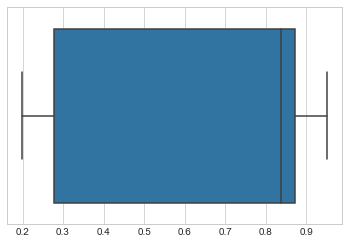

In [8]:
seed = 100
pipelines = []


pipelines.append(
                ("Scaled_Ridge", 
                 Pipeline([
                     ("Scaler", StandardScaler()), 
                     ("Ridge", Ridge(random_state=seed))
                      ]))
                )

pipelines.append(
                ("Scaled_Lasso", 
                 Pipeline([
                     ("Scaler", StandardScaler()), 
                     ("Lasso", Lasso(random_state=seed))
                      ]))
                )

#pipelines.append(
#                ("Scaled_SVR",
#                 Pipeline([
#                     ("Scaler", StandardScaler()),
#                     ("SVR", SVR())
#                 ])
#                )
#                )

pipelines.append(
                ("Scaled_RF",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("RF", RandomForestRegressor(random_state=seed))
                 ])
                )
                )

pipelines.append(
                ("Scaled_ET",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("ET", ExtraTreesRegressor(random_state=seed))
                 ])
                )
                )
pipelines.append(
                ("Scaled_BR",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("BR", BaggingRegressor(random_state=seed))
                 ])
                )
                )

pipelines.append(
                ("Scaled_XGB",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("XGB", XGBRegressor(seed=seed))
                 ])
                )
                )

scoring = 'r2'
n_folds = 10
results, names  = [], [] 

for name, model  in pipelines:
    kfold = KFold(n_splits=n_folds, shuffle=True, random_state=seed)
    cv_results = cross_val_score(model, X, Y, cv= kfold,
                                 scoring=scoring, n_jobs=-1)    
    names.append(name)
    results.append(cv_results)    
    msg = "%s: %f (+/- %f)" % (name, cv_results.mean(),  cv_results.std())
    print(msg)
    
results = pd.DataFrame(np.array(results).T, columns = names)    
sns.boxplot(data=results,palette='rainbow')
plt.show()

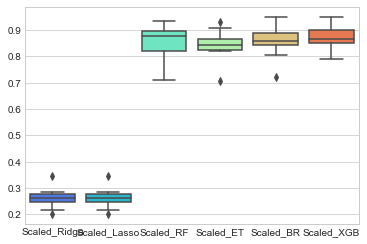

In [13]:
#sns.boxplot(results)
sns.boxplot(data=results,palette='rainbow')

In [10]:
results

,Scaled_Ridge,Scaled_Lasso,Scaled_RF,Scaled_ET,Scaled_BR,Scaled_XGB
0,0.278196,0.278397,0.925078,0.907307,0.917766,0.909975
1,0.346879,0.346882,0.875720,0.849006,0.864280,0.889038
2,0.248316,0.248199,0.901550,0.848048,0.896096,0.867339
3,0.276924,0.276892,0.842832,0.838572,0.838960,0.853840
4,0.216770,0.216682,0.710658,0.822400,0.721002,0.851399
5,0.259752,0.259794,0.883837,0.840032,0.856004,0.868557
6,0.199799,0.199789,0.879761,0.871979,0.870730,0.905014
7,0.283801,0.283850,0.934879,0.931121,0.950980,0.950044
8,0.250077,0.250434,0.813935,0.707381,0.850541,0.791405
9,0.264302,0.264419,0.802802,0.821653,0.804324,0.837122


In [ ]:
## Approach 4: Applying Feature Engineering ##

In [168]:
Train_data_v3=Train_data_v1.copy()
Test_data_v3=Test_data_v1.copy()
Train_data_v3.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,0,3942,2,155623,7855,42
1,327662,0,26046,12,21781,55801,1175
2,468453,1,1358,4,56177,8067,60
3,96996,0,264,3,168793,27064,9
4,131465,1,4271,4,112223,13986,83


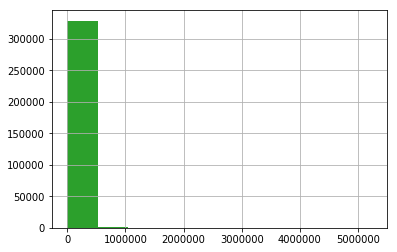

In [169]:
Train_data_v3['Reputation'].hist()
Train_data_v3['Answers'].hist()
Train_data_v3['Views'].hist()

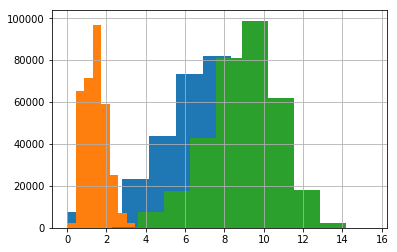

In [170]:
Train_data_v3['Reputation'].apply(lambda x: np.log(x+1)).hist()
Train_data_v3['Answers'].apply(lambda x: np.log(x+1)).hist()
Train_data_v3['Views'].apply(lambda x: np.log(x+1)).hist()

In [173]:
## Train features ##
Train_data_v3['log_Reputation'] = Train_data_v3['Reputation'].apply(lambda x: np.log(x+1))
Train_data_v3['log_Answers'] = Train_data_v3['Answers'].apply(lambda x: np.log(x+1))
Train_data_v3['log_Views'] = Train_data_v3['Views'].apply(lambda x: np.log(x+1))

Train_data_v3['Username_count'] = Train_data_v3.groupby('Username')['Username'].transform('count')
Train_data_v3['log_Username_count'] = Train_data_v3['Username_count'].apply(lambda x: np.log(x+1))
#Train_data_v3['Username_count'].hist()

Train_data_v3['Tag_count'] = Train_data_v3.groupby('Tag')['Tag'].transform('count')
#Train_data_v3['Tag'].hist()

Train_data_v3['Reputation_rank'] = Train_data_v3['Reputation'].rank(pct=True,ascending=False)*100
Train_data_v3['Views_rank'] = Train_data_v3['Views'].rank(pct=True,ascending=False)*100
#Train_data_v3.sort_values(by='Reputation')
#Train_data_v3['Views_rank'].hist()

Train_data_v3['Reputation_by_Views']=Train_data_v3['Reputation']/Train_data_v3['Views']
Train_data_v3['log_Reputation_by_Views'] = Train_data_v3['Reputation_by_Views'].apply(lambda x: np.log(x+1))
#Train_data_v3['log_Reputation_by_Views'].hist()

Train_data_v3['Reputation_by_Answers']=Train_data_v3['Reputation']/Train_data_v3['Answers']
Train_data_v3['Reputation_by_Answers']=Train_data_v3['Reputation_by_Answers'].replace(np.inf,0)
Train_data_v3['log_Reputation_by_Answers'] = Train_data_v3['Reputation_by_Answers'].apply(lambda x: np.log(x+1))
#Train_data_v3['log_Reputation_by_Answers'].hist()

Train_data_v3['Views_by_Answers']=Train_data_v3['Views']/Train_data_v3['Answers']
Train_data_v3['Views_by_Answers']=Train_data_v3['Views_by_Answers'].replace(np.inf,0)
Train_data_v3['log_Views_by_Answers'] = Train_data_v3['Views_by_Answers'].apply(lambda x: np.log(x+1))
#Train_data_v3['log_Views_by_Answers'].hist()



## Test features ##

Test_data_v3['log_Reputation'] = Test_data_v3['Reputation'].apply(lambda x: np.log(x+1))
Test_data_v3['log_Answers'] = Test_data_v3['Answers'].apply(lambda x: np.log(x+1))
Test_data_v3['log_Views'] = Test_data_v3['Views'].apply(lambda x: np.log(x+1))

Test_data_v3['Username_count'] = Test_data_v3.groupby('Username')['Username'].transform('count')
Test_data_v3['log_Username_count'] = Test_data_v3['Username_count'].apply(lambda x: np.log(x+1))
#Test_data_v3['Username_count'].hist()

Test_data_v3['Tag_count'] = Test_data_v3.groupby('Tag')['Tag'].transform('count')
#Test_data_v3['Tag'].hist()

Test_data_v3['Reputation_rank'] = Test_data_v3['Reputation'].rank(pct=True,ascending=False)*100
Test_data_v3['Views_rank'] = Test_data_v3['Views'].rank(pct=True,ascending=False)*100
#Test_data_v3.sort_values(by='Reputation')
#Test_data_v3['Views_rank'].hist()

Test_data_v3['Reputation_by_Views']=Test_data_v3['Reputation']/Test_data_v3['Views']
Test_data_v3['log_Reputation_by_Views'] = Test_data_v3['Reputation_by_Views'].apply(lambda x: np.log(x+1))
#Test_data_v3['log_Reputation_by_Views'].hist()

Test_data_v3['Reputation_by_Answers']=Test_data_v3['Reputation']/Test_data_v3['Answers']
Test_data_v3['Reputation_by_Answers']=Test_data_v3['Reputation_by_Answers'].replace(np.inf,0)
Test_data_v3['log_Reputation_by_Answers'] = Test_data_v3['Reputation_by_Answers'].apply(lambda x: np.log(x+1))
#Test_data_v3['log_Reputation_by_Answers'].hist()

Test_data_v3['Views_by_Answers']=Test_data_v3['Views']/Test_data_v3['Answers']
Test_data_v3['Views_by_Answers']=Test_data_v3['Views_by_Answers'].replace(np.inf,0)
Test_data_v3['log_Views_by_Answers'] = Test_data_v3['Views_by_Answers'].apply(lambda x: np.log(x+1))
#Test_data_v3['log_Views_by_Answers'].hist()



Train_data_v3.head()
#Test_data_v3.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes,log_Reputation,log_Answers,log_Views,...,log_Username_count,Tag_count,Reputation_rank,Views_rank,Reputation_by_Views,log_Reputation_by_Views,Reputation_by_Answers,log_Reputation_by_Answers,Views_by_Answers,log_Views_by_Answers
0,52664,0,3942,2,155623,7855,42,8.279697,1.098612,8.969033,...,2.995732,31695,29.186475,53.020043,0.501846,0.406695,1971.00,7.586804,3927.500000,8.276013
1,327662,0,26046,12,21781,55801,1175,10.167658,2.564949,10.929565,...,1.098612,31695,6.279598,12.537381,0.466766,0.383060,2170.50,7.683173,4650.083333,8.444855
2,468453,1,1358,4,56177,8067,60,7.214504,1.609438,8.995661,...,0.693147,72458,48.303716,52.435425,0.168340,0.155584,339.50,5.830415,2016.750000,7.609738
3,96996,0,264,3,168793,27064,9,5.579730,1.386294,10.205997,...,1.386294,31695,75.413353,24.859337,0.009755,0.009707,88.00,4.488636,9021.333333,9.107458
4,131465,1,4271,4,112223,13986,83,8.359837,1.609438,9.545884,...,1.386294,72458,27.849081,39.519156,0.305377,0.266492,1067.75,6.974245,3496.500000,8.159804


In [174]:
Train_data_v4=Train_data_v3.copy()
#Train_data_v4.head()

In [177]:
Train_data_v3.isin([np.nan, np.inf, -np.inf]).sum()
# Used log(x+1) instead of log(x) transformation, otherwise will have to replace by 
# Train_data_v3['log_Reputation'] =  Train_data_v3['log_Reputation'].replace(-np.inf,0)
#Train_data_v3.describe().round()

ID                           0
Tag                          0
Reputation                   0
Answers                      0
Username                     0
Views                        0
Upvotes                      0
log_Reputation               0
log_Answers                  0
log_Views                    0
Username_count               0
log_Username_count           0
Tag_count                    0
Reputation_rank              0
Views_rank                   0
Reputation_by_Views          0
log_Reputation_by_Views      0
Reputation_by_Answers        0
log_Reputation_by_Answers    0
Views_by_Answers             0
log_Views_by_Answers         0
dtype: int64

In [202]:
#Train_data_v3.info()
#np.isnan(Train_data_v3['log_Reputation_by_Answers']).any()
#Train_data_v3[isnan(Train_data_v3['log_Reputation_by_Answers'])]['log_Reputation_by_Answers']
Train_data_v3['log_Reputation_by_Answers'].isnull().sum()
Train_data_v3['log_Reputation_by_Answers'] =  Train_data_v3['log_Reputation_by_Answers'].replace(np.nan,0)
Test_data_v3['log_Reputation_by_Answers'] =  Test_data_v3['log_Reputation_by_Answers'].replace(np.nan,0)

In [213]:
X3=Train_data_v3[['Tag','Username','log_Reputation','log_Answers','log_Views','log_Username_count','Tag_count',
                  'Reputation_rank','Views_rank','log_Reputation_by_Views','log_Reputation_by_Answers'
                  ,'log_Views_by_Answers']]  # Features
Y3=Train_data_v3['Upvotes']  # Labels
clf4=GradientBoostingRegressor(loss='ls',learning_rate=0.1, n_estimators=92,random_state=100,max_depth=3,
                              criterion='friedman_mse')
clf4.fit(X3,Y3)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=92, presort='auto', random_state=100,
             subsample=1.0, verbose=0, warm_start=False)

In [214]:
y_pred4=clf4.predict(Test_data_v3[['Tag','Username','log_Reputation','log_Answers','log_Views','log_Username_count',
                                   'Tag_count','Reputation_rank','Views_rank','log_Reputation_by_Views',
                                   'log_Reputation_by_Answers','log_Views_by_Answers']])
y_predicted4 = pd.DataFrame(y_pred4)
y_predicted4.columns = ["Upvotes"]
output4=pd.concat([Test_data_v3['ID'],y_predicted4], axis=1)
output4[['ID','Upvotes']].to_csv('C:/Users/rahul.bhasin/Desktop/Hackathon/Outputs/output_4.csv',index=False)
output4.head()

,ID,Upvotes
0,366953,158.727529
1,71864,294.407201
2,141692,38.302542
3,316833,-51.817129
4,440445,209.438793


In [199]:
feature_imp = pd.Series(clf4.feature_importances_,index=['Tag','Username','log_Reputation','log_Answers','log_Views','log_Username_count',
                                   'Tag_count','Reputation_rank','Views_rank','log_Reputation_by_Views',
                                   'log_Reputation_by_Answers','log_Views_by_Answers']).sort_values(ascending=False)
feature_imp

log_Reputation               0.305038
Reputation_rank              0.255148
log_Views                    0.187735
Views_rank                   0.152200
log_Reputation_by_Views      0.044648
log_Reputation_by_Answers    0.012985
log_Username_count           0.009381
Username                     0.008958
log_Views_by_Answers         0.007341
log_Answers                  0.006452
Tag                          0.006067
Tag_count                    0.004047
dtype: float64